Rather than my convoluted code and loops, load in what Krishan has done for different stages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from scipy.io import loadmat

In [217]:
NSV = loadmat('/vol/sas2b/Goose_Multiscale_M1_Wireless/180327/001/rec001.NightStateVars.mat')

In [218]:
NSV.keys()

dict_keys(['__header__', '__version__', '__globals__', 'UserData', '__function_workspace__'])

In [219]:
NSV['UserData'][0][0].dtype

dtype([('freqs', 'O'), ('ztotSpec', 'O'), ('EventHorizonsDrawn', 'O'), ('NeuralRecLightsOnStates', 'O'), ('NeuralRecLightsOffStates', 'O'), ('NeuralRecMovementStates', 'O'), ('NeuralRecSleepStates', 'O'), ('ArtifactStates', 'O'), ('NonArtifactStates', 'O'), ('NeuralRecLightsOnStates_noart', 'O'), ('NeuralRecLightsOffStates_noart', 'O'), ('MovementStates_noart', 'O'), ('SleepStates_noart', 'O')])

In [220]:
NSV['UserData'][0][0]['ztotSpec'].shape

(100, 7197)

In [221]:
## Test: Check out movment stuff from our code and check if consistent. 

our_spec_data = loadmat('../../../Spectrogram_mat_data/N10W1dn1_180327_rec001.mat')

array([[3280, 3852]], dtype=uint16)

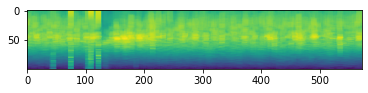

In [111]:
# Test: Look at an examples

sleep = NSV['UserData'][0][0]['SleepStates_noart'][0][2]

plt.imshow(NSV['UserData'][0][0]['ztotSpec'][:,sleep[0][0]:sleep[0][1]])

sleep

array([[3250, 3279]], dtype=uint16)

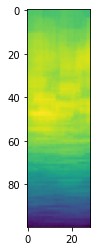

In [112]:
## Test: Look at an examples

move = NSV['UserData'][0][0]['MovementStates_noart'][0][2]

plt.imshow(NSV['UserData'][0][0]['ztotSpec'][:,move[0][0]:move[0][1]])

move

In [123]:
move = NSV['UserData'][0][0]['MovementStates_noart'][0][:]


In [125]:
for m in move:
    break

In [128]:
start = m[0][0] 
stop = m[0][1]

In [130]:
start, stop

(5, 2211)

In [131]:
ztotSpec = NSV['UserData'][0][0]['ztotSpec']


In [135]:
mspec = torch.from_numpy(ztotSpec[:,start:stop])

In [139]:
mspecs = torch.split(mspec,10,dim=1)

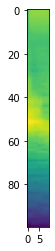

In [142]:
plt.imshow(mspecs[0])

In [164]:
len(os.listdir('../../../Noah/datav3/move/'))

2592

In [165]:
len(os.listdir('../../../Noah/datav3/sleep/'))

3035

In [213]:
# Load in examples

x = np.load('../../datav3/sleep/180327_001_na_win102_sleep.npy')

In [214]:
x.mean(), x.std()

(0.010887046521612117, 1.0151428270490035)

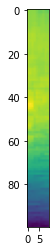

In [203]:
plt.imshow(x)

In [211]:
x = np.load('../../datav4/move/180327_001_62_win100_move.npy')

In [212]:
x[0].mean(), x[0].std()

(-0.2512520734686443, 0.4018703840807783)

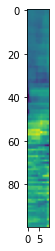

In [209]:
plt.imshow(x[0].T)

In [176]:
!cd ../../datav4

In [189]:
torch.transpose(x.reshape(1,62,10,100),dim1=2,dim2=3)

TypeError: transpose() received an invalid combination of arguments - got (numpy.ndarray, dim2=int, dim1=int), but expected one of:
 * (Tensor input, name dim0, name dim1)
      didn't match because some of the keywords were incorrect: dim2
 * (Tensor input, int dim0, int dim1)
      didn't match because some of the keywords were incorrect: dim2
